In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def exp(x, N, t, C):
    """
    Exponential function to fit the data with uniform background.
    :param x: x values
    :param N: Amplitude
    :param t: Decay constant in 1/us
    :param C: Background constant
    """
    return N * np.exp(-x/t) + C

In [4]:
# Read in data
# data = np.loadtxt('24-10-17-11-11.data')
data = pd.read_csv('24-10-17-11-11.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
data['time'] = data['time']- data['time'].min()
data



,dt,time
0,40000.0,0
1,40000.0,1
2,20000.0,1
3,20000.0,1
4,20000.0,1
...,...,...
262657,20000.0,24951
262658,20000.0,24951
262659,20000.0,24951
262660,40003.0,24952


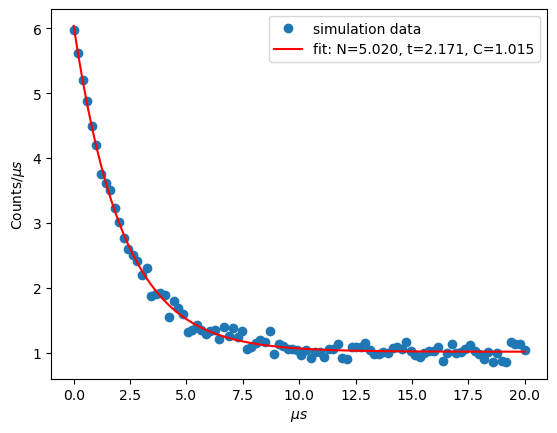

In [59]:
def simulate_data_exp(sims, N, t, C, noise=0.1):
    """
    Simulate data with exponential decay and uniform background.
    :param sims: Number of simulations
    :param N: Amplitude
    :param t: Decay constant
    :param C: Background constant
    :param noise: Noise level
    """
    x = np.linspace(0, 20, sims)
    y = exp(x, N, t, C)
    y += noise * np.random.randn(sims)
    return x, y


# Simulate data
t = 2.2 # Decay constant in 1/us
x, y = simulate_data_exp(100, 5, t, 1)

# Fit the data
popt, pcov = curve_fit(exp, x, y, p0=[5, 1, 1])

plt.plot(x, y, 'o', label='simulation data')
plt.plot(x, exp(x, *popt), 'r-', label='fit: N=%5.3f, t=%5.3f, C=%5.3f' % tuple(popt))
plt.xlabel('$\mu s$')
plt.ylabel('Counts/$\mu s$')
plt.legend()
plt.show()



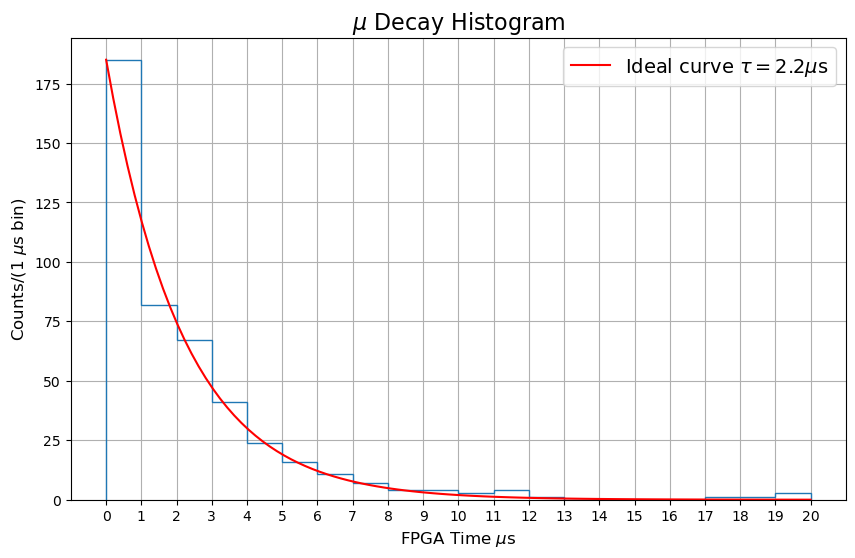

In [90]:
plt.figure(figsize=(10, 6))
hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1)
plt.xticks(np.arange(0, 21, 1));

plt.grid()

# Plot the data using literature value of 2.2 us
t = 2.2 # Decay constant in 1/us
plt.plot(np.linspace(0, 20, 100), exp(np.linspace(0, 20, 100), np.max(hist[0]), t, 0), 'r-', label='Ideal curve $τ = 2.2\mu$s')
plt.title("$\mu$ Decay Histogram", fontsize=16)
plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Counts/(1 $\mu$s bin)', fontsize=12)
plt.legend(fontsize=14)
# plt.show()
plt.savefig('muonPHY451_fig6.jpg', dpi=400)


In [ ]:
# def simulate_data_exp(sims, N, t, C, noise=0.1):
#     """
#     Simulate data with exponential decay and uniform background.
#     :param sims: Number of simulations
#     :param N: Amplitude
#     :param t: Decay constant
#     :param C: Background constant
#     :param noise: Noise level
#     """
#     x = np.linspace(0, 20, sims)
#     y = exp(x, N, t, C)
#     y += noise * np.random.randn(sims)
#     return x, y


# # Simulate data
# t = 2.2 # Decay constant in 1/us
# x, y = simulate_data_exp(100, np.max(hist[0]), t, 1)

# # Fit the data
# popt, pcov = curve_fit(exp, x, y, p0=[5, 1, 1])

In [122]:
x = np.arange(0.5,20) # middle of bins
popt, pcov = curve_fit(exp, x, hist[0], p0=[150, t, 1])
print(popt)
print(np.sqrt(np.diag(pcov)))

[232.54451372   1.77571667   2.32392922]
[10.12374834  0.12029088  1.69669434]


1.6923076923076923

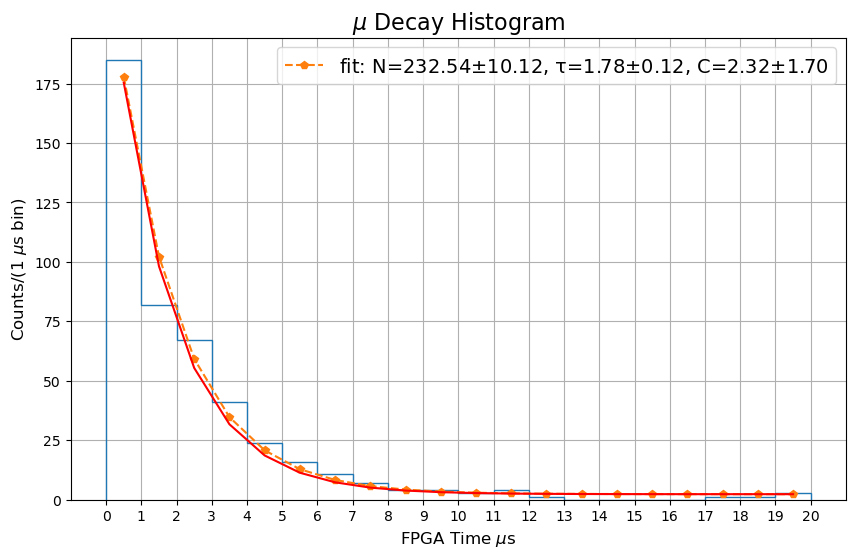

In [137]:
plt.figure(figsize=(10, 6))
hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1)
plt.xticks(np.arange(0, 21, 1));

plt.grid()

# Plot the data using literature value of 2.2 us
t = 2.2 # Decay constant in 1/us
obs_t = t/1.3

plt.plot(x, exp(x, *popt), 'p--', label=f'fit: N={popt[0]:.2f}$\pm${np.sqrt(np.diag(pcov))[0]:.2f}, τ={popt[1]:.2f}$\pm${np.sqrt(np.diag(pcov))[1]:.2f}, C={popt[2]:.2f}$\pm${np.sqrt(np.diag(pcov))[2]:.2f}')

plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Counts/(1 $\mu$s bin)', fontsize=12)
plt.legend(fontsize=14)

plt.plot(x, exp(x, popt[0], t, popt[2]), 'r-', label='Ideal curve $τ = 2.2\mu$s')
plt.title("$\mu$ Decay Histogram", fontsize=16)

# plt.show()
# plt.savefig('muonPHY451_fig6.jpg', dpi=400)




631.5761631867912


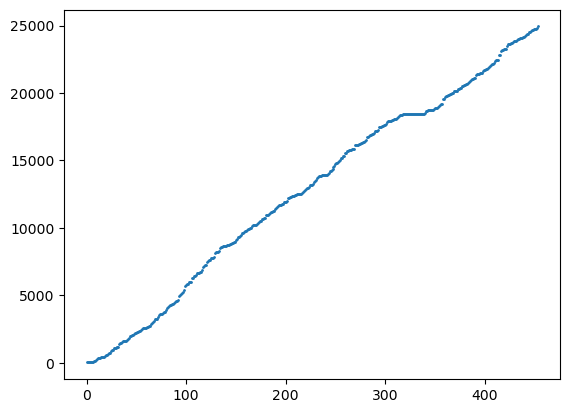

In [12]:
gate = data['dt']<20000

plt.scatter(np.arange(len(data['dt'][gate])), data['time'][gate], s=1)

print(len(data)/data['time'].max()*60)

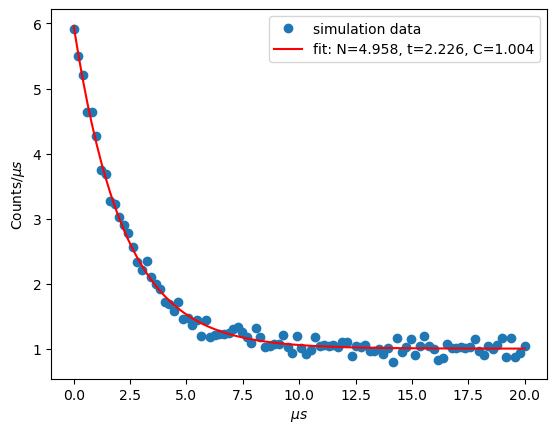